# Simülasyon ile çıkarım yapma

Diyelim ki Türkiye'deki genç nüfusun (15-24 yaş) %88'i Türkiye'den gitmek için çaba gösterilmesini (iş aramak, yurt dışı sınavlarına çalışmak v.b.) destekliyor.
Şimdi yapacağımız şey ise şu: 1000 tane genç kişi seçip bu soruyu sorduğumuzda örneklemimizin oranı %88'e ne kadar yakın olur ona bakacağız.
Yani gerçek popülasyon parametresi .88'ken örneklemimizden çıkardığımız tahmin nasıl davranır?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

%matplotlib inline

Boş bir torba oluşturdum.

In [2]:
li = []

Genç nüfusun 10 milyon olduğunu varsaydım.

In [3]:
pop_size = 10000000

In [4]:
for i in range(0, int(pop_size * .88)):
    li.append("support")

In [5]:
for j in range(0, int(pop_size * .12)):
    li.append("not")

In [6]:
print("Number of support: " + str(li.count("support")))
print("Number of not: " + str(li.count("not")))

Number of support: 8800000
Number of not: 1200000


10 milyon adet (genç nüfus kadar) kağıt aldım ve bunların %88'ine "destekliyor", %12'sine "desteklemiyor" yazdım (aynı genç nüfüstaki sıklığı/frekansı yarattım). Yukarıda oluşturduğum torbaya koydum bu kağıtları. Şimdi torbayı karıştırıp 1000 adet kağıt seçeceğim, yani aslında 1000 adet genç seçiyormuş gibi yapacağım (ilk başta yapmak istediğimiz de buydu — 1000 tane genç seçip orana bakmak istiyorduk).

In [7]:
my_samples = []
for v in range(1000):
    sampl_np = np.random.choice(li, size=1000, replace=True)
    sampl = sampl_np.tolist()
    my_samples.append(sampl.count("support"))

In [8]:
my_samples[:10]

[891, 892, 874, 876, 888, 865, 876, 886, 881, 870]

In [9]:
def prop(x):
    return (x / 1000)

In [10]:
proportions = [prop(x) for x in my_samples]

In [11]:
proportions[:10]

[0.891, 0.892, 0.874, 0.876, 0.888, 0.865, 0.876, 0.886, 0.881, 0.87]

Sadece bir kere 1000 adet genç seçmek yerine bunu 1000 defa yaptım ki tahminlerimin (örneklemimden hesapladığım oranların) dağılımı hakkında bir fikrim olsun.

Yani torbadan 1000 defa 1000 adet kağıt seçtik. Her seçtiğimizde de destekleyenlerin oranını hesaplayıp not ettik.
Sonrasındaysa bu oranları alttaki gibi iki grafiğe çizdirdim. İşte bu gördüğümüz şeye "sampling distribution" deniyor.

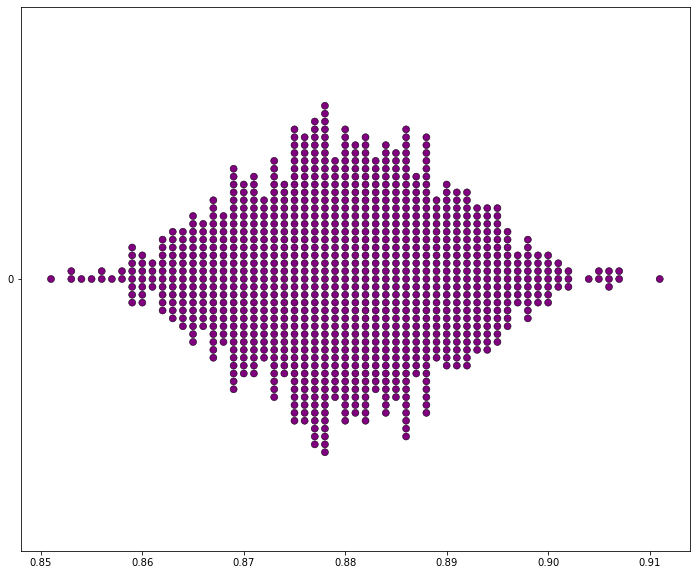

In [12]:
plt.figure(figsize=(12,10))

g = sns.swarmplot(data=proportions, orient="h", size=7, color="purple", linewidth=0.5,
                 edgecolor="black")

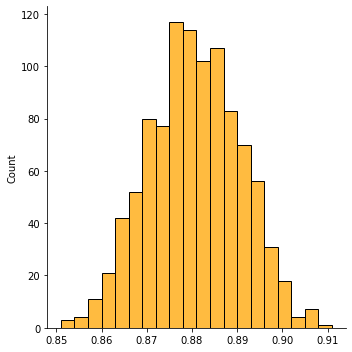

In [32]:
g = sns.displot(data=proportions, bins=20, color="orange")

Elbette gerçekte böyle bir şey gözlemlemiyoruz (1000 defa 1000 kişi seçmiyoruz), fakat bunun aklımızda olması hipotez testi mantığını anlamakta faydalı. Yukarıdaki grafikte dikkat çeken bir şey var, dağılım normal dağılıma çok benziyor ve bu bir tesadüf değil :) Merkezi Limit Teoremi'nin bir ürünü. Biz de bundan yararlanıyoruz aslında, birazdan değineceğim buna.

Gerçek hayatta n'apıyoruz peki? Araştırmamıza başlamadan önce test etmek istediğimiz bir şey oluyor. Mesela yukarıdaki örnekle alakalı aklımızda şöyle bir şey olabilir:
"Genç nüfus arasında Türkiye'den gitmek için çaba gösterilmesini destekleyenler daha fazladır"
veya bir fikrimiz de olmayabilir. Fark var mı yok mu merak ediyor olabiliriz.
"Genç nüfus arasında Türkiye'den gitmek için çaba gösterilmesini destekleyenler ile desteklemeyenler arasında fark var mı?" Pekala. Bu son soru bizim araştırma sorumuz olsun. Buradaki araştırma sorusunu test edebileceğimiz hipotezlere çevirebiliriz değil mi?

*Boş hipotez*: Genç nüfus arasında Türkiye'den gitmek için çaba gösterilmesini destekleyenler ile desteklemeyenler arasında fark **yoktur.** \
*Alternatif hipotez*: Genç nüfus arasında Türkiye'den gitmek için çaba gösterilmesini destekleyenler ile desteklemeyenler arasında fark **vardır.**

Boş hipotezimizde fark yok diyor. O halde destekleyenlerin oranı için bekleyeceğimiz değer 0.5'tir değil mi, bu sayede destekleyenlerle desteklemeyenler eşit olur dolayısıyla fark çıkmaz. O zaman boş hipoteze karşılık gelen değeri belirledik:\
*Boş Hipotez* = 0.5\
*Alternatif Hipotez* ≠ 0.5

Bu bilgileri cebe attık. Yukarıdaki örnekte gerçeği biliyorduk fakat hayatta bilmiyoruz, ayrıca sampling distributionı da gözlemlemiyoruz. Diyelim ki 1000 kişi topladık ve destekleyenlerin oranını hesapladık (bu orana *p̂* diyelim, *p* ise gerçekteki oran olsun), 0.86 çıkmış olsun. 0.86 değeri için sampling distributionın normal dağılacağını nereden bileceğiz? İşte *Merkezi Limit Teoremi* burada devreye giriyor. Merkezi Limit Teoremi diyor ki gözlemlerimiz birbirinden bağımsızsa (bağımsız, rassal seçim yaptık) ve örneklemimiz yeterince büyükse (np > 9 ve n(1-p) > 9, bizim büyük)  *p̂* yaklaşık (elbette kusursuz olamaz çünkü ayrık değerlerden (destekleyenlerin sayısı / katılımcı sayısı) bahsediyoruz) normal bir dağılım verir. Peki, normal dağılımın iki parametresi var: *μ* (ortalama), *σ* (standart sapma)

Merkezi Limit Teoremi'ne göre *μ*'muz *p*'ye eşit oluyor. Peki ya standart sapma? Bahsettiğimiz şey özet istatistiğin dağılımı olduğunda (oran veya ortalama) standart sapmaya *standart hata (SE)*  deniyor. Daha net olmak adına: Verimizdeki gözlem birimlerinin değişkenliğinden bahsederken standart sapma, verimizden hesapladığımız özet istatistiğinin (bu örneğimizde oran) dağılımındaki değişkenlikten bahsederken standart hata diyoruz.
Merkezi Limit Teoremi'ne göre standart hatamız da: $ SE= \sqrt \frac{p(1-p)} {N} $ yani standart hata için değerimiz $ SE_p̂= 0.011 $

*p*'yi bilmiyoruz tabii gerçekte, o yüzden yerine en yakın tahminimiz olan *p̂ (p-hat)*'i kullandık. Bu bilgilerle,*N*(*μ* = 0.86, *p̂* = 0.011), dağılımımızı biliyoruz ve bunu 0.5 değerini (boş hipotezimize karşılık gelen değeri) görme sıklığımızı anlamak için kullanabiliriz. Normal bir dağılımdaki gözlemlerin %99.7'si 3 standart sapma (burada standart hata) içinde olur. Yani %99.7'si 0.86 - (0.011x3) ile 0.86 + (0.011x3) arasında olacak. 0.5'e çok çok çok uzak farkındaysak :)

Zaten yukarıdaki dağılıma **çok çok çok** benzer bir dağılımdan bahsediyoruz ve farkındaysak 0.5 grafikte bile yok! Ben yukarıdaki grafiğe *kernel density estimation* eklememiştim, çünkü bunu yazıya çevireceğimi düşünmüyordum o an. Fakat başka bir araç kullanarak yukarıdaki grafikten çizdim.

![Örnek](CLT_Prop.png)\
Görsel gözükmüyorsa linkten ulaşılabilinir: https://www.hizliresim.com/9dzzalw

Burada grafik üzerindeki "density" çizgisi. Normal dağılımdan bahsettiğimiz için o çizgiyi de eklemenin anlamlı olacağını düşündüm. Bu çizginin altında kalan alanın tamamı 1 ediyor. 0.5 gelme olasılığını hesaplamak için (daha doğrusu 0.5 ve daha uç değerlerin gelme olasılığını hesaplamak için) 0.5'in altında kalan alanı hesaplamak gerekiyor, alanı görmüyoruz bile :) Neyse.

Yukarıdakilere ek olarak boş hipotez testini şöyle de düşünebiliriz: Hipotez testimizi yaparken boş hipotezimizin doğru olduğunu farz ediyoruz ya ve boş hipotezimize karşılık gelen değeri 0.5 kabul etmiştik. E bu dağılımın ortasının 0.5'te olduğunu düşünelim, "böyle bir durumda örneklemimizde gördüğümüz değeri (veya daha uç bir değeri) görme olasılığımız nedir" sorusunun cevabı çok küçük bir değer değil mi :) 

Neyse, ek olarak şöyle bir örnek de ekledim aşağıya. Bu örnekte kullanacağım yöntem biraz daha farklı olacak, çünkü popülasyondan örneklem almak yerine bootstrapping yapacağım (verideki gözlem birimleri gibi popülasyonda başka gözlem birimleri olduğunu varsayacağım)

In [14]:
df = pd.read_csv("sex_discrimination.csv")

In [15]:
df.head()

,sex,decision
0,male,promoted
1,male,promoted
2,male,promoted
3,male,promoted
4,male,promoted


Yukarıdaki veri 1972'de yapılmış bir deneyden geliyor. Deneyin katılımcıları erkek işverenlerden oluşuyor ve iki gruba rassal bir şekilde atanıyorlar. Bu işverenlere sadece cinsiyeti farklı olan CV'ler veriyoruz (bir gruba kadın bir gruba erkek) ve kişinin terfiyi hak edip hak etmediğini soruyoruz.
Yukarıdaki tabloda sadece ilk 5 gözlem birimini gösterdim, aşağıda verilen cevapları daha net bir şekilde görebiliriz.

In [16]:
table_sex_disc = pd.crosstab(df["sex"], df["decision"], margins=True)

In [17]:
table_sex_disc

decision,not promoted,promoted,All
sex,,,
female,10,14,24
male,3,21,24
All,13,35,48


In [18]:
(21/24) - (14/24)

0.29166666666666663

In [19]:
diff_data = (table_sex_disc.loc["male", "promoted"] /24) - (table_sex_disc.loc["female", "promoted"] /24)
diff_data 

0.29166666666666663

Deneye başlamadan önce araştırmacıların merakı kadınların negatif bir ayrımcılığa uğrayıp uğramadıklarıydı. Deneyde iki cinsiyet arasındaki terfi farkı %29.2 ile erkekler lehine.\
Bu fark \
(1) şans eseri (sampling error) oluşmuş olabilir (örneklem alıyoruz ya, tüm erkek işverenlere gitmiyoruz. Aralarından seçiyoruz). Yani aslında terfi almak ve cinsiyet birbirinden bağımsızdır. Böyle bir durumda kadın ile erkeklerin terfi alma farkının 0 olmasını bekleriz. Bu bizim boş hipotezimiz.\
(2) Cinsiyet ve terfi birbirine bağımlıdır. Gördüğümüz fark da bu bağımlılığın, yani kadınlara karşı negatif ayrımcılığın bir ürünüdür. Bu da bizim alternatif hipotezimiz.

Şimdi bu beyanları simülasyon ile test edelim.

In [20]:
promotions = []

In [21]:
for i in range(0,35):
    promotions.append("promoted")

In [22]:
for j in range(0,13):
    promotions.append("not")

In [23]:
promotions.count("promoted")

35

Yine bir torba oluşturdum ve içerisinde 48 adet kağıt var. 35'inde terfi edildi, 13'ündeyse edilmedi yazıyor.

İlk beyanımızın (yani boş hipotezimizin) doğru olduğunu varsayacağız ve bu varsayımımız altında örneklemimizde gördüğümüz farkı görmemizin makul olup olmadığına bakacağız.
Daha spesifik olmak gerekirse, kadınlara negatif bir ayrımcılık olmadığını varsaydığımızda bu farkı görme olasılığımıza bakacağız. Eğer ayrımcılık olmadığında çok çok nadir görünen bir farksa, ayrımcılık olduğuna dair kuvvetli şüphelerimiz olacak.

Bunu test ederken simülasyon yöntemini kullanacağız. Torbamızı hazırlamıştık, şimdi torbamızdan rastgele seçeceğimiz kağıtların 24 tanesini kadın torbasına, 24 tanesini erkek torbasına koyacağız. Sonrasında da aralarındaki terfi farkını hesaplayacağız. Yapalım.

In [24]:
males = []
females = []

In [25]:
for v in range(100):
    sampl_all = np.random.choice(promotions, size=48)
    sampl_males = sampl_all[0:24].tolist()
    males.append(sampl_males.count("promoted") / 24)
    sampl_females = sampl_all[24:48].tolist()
    females.append(sampl_females.count("promoted") / 24)

In [26]:
males_nd = np.array(males)
females_nd = np.array(females)

In [27]:
diff_arr = males_nd - females_nd

Yukarıdaki işlemi 100 kere (1000 yapınca beklemem gerekiyor bayağı, o yüzden 100 defa yaptım bu sefer) yaptık ve her seferinde aradaki farkı hesaplayıp not ettik. Bunları aşağıdaki gibi iki grafiğe aktardım.

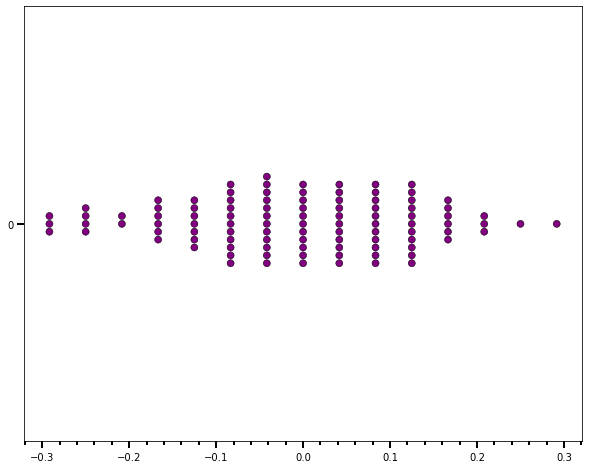

In [28]:
plt.figure(figsize=(10,8))

g = sns.swarmplot(data=diff_arr, orient="h", size=7, color="purple", linewidth=0.5,
                 edgecolor="black")

g.xaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

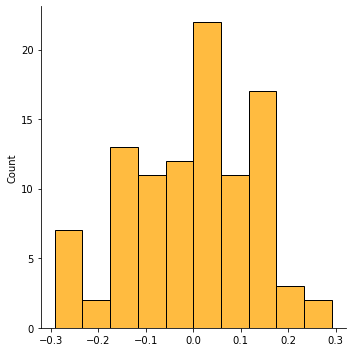

In [29]:
g = sns.displot(data=diff_arr, bins=10, color="orange", edgecolor="black")

Fark ettiysek dağılımımızın ortası 0 civarlarında. Zaten böyle olmasını beklemez miyiz? Ayrımcılık olmadığında kadınların ve erkeklerin terfilerinde bir fark olmamasını bekleriz, yani farkın "0" olmasını bekleriz. E zaten simülasyonumuzu da bunun doğru olduğunu varsayarak yapmıştık.

Dağılımımızdan da görebileceğimiz gibi %29.2'lik veya daha uç bir fark görmek, ayrımcılığın olmadığı durumlarda (farkın 0 olduğunu, boş hipotezimizin doğru olduğunu varsaydığımız durumlarda), çok çok nadir gerçekleşiyor. Dolayısıyla gördüğümüz farkın şans eseri oluşmadığına dair şüphelerimiz kuvvetli. Bu sebeple ilk beyanımızı (boş hipotezimizi), gördüğümüz farkın şans eseri ortaya çıktığı inancımızı, reddediyoruz.